In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from mpl_toolkits import mplot3d

**Data Matrix**

Patient dataset corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

In [ ]:
## Create patient data matrix
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})
print(df_patient)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0


# **1. Which patient is farthest from the rest**

In [ ]:
X = np.array(df_patient)
print(X)


[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


In [ ]:
# Vector for 1st patient
x1 = X[0, :]
print(x1)

# Vector for 2nd patient
x2 = X[1, :]
print(x2)

# Vector for 3rd patient
x3 = X[2, :]
print(x3)

# Vector for 4th patient
x4 = X[3, :]
print(x4)


[ 76. 126.  38.]
[ 74. 120.  38.]
[ 72.  118.   37.5]
[ 78. 136.  37.]


In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

max_dist = -1
farthest_patient_id = -1

# Calculate distances and find farthest patient
for i in range(len(X)):
    distance_sum = 0
    for j in range(len(X)):
        if i != j:
            dist = euclidean_distance(X[i, :], X[j, :])
            distance_sum += dist
            #print(dist)
    if distance_sum > max_dist:
        max_dist = distance_sum
        farthest_patient_id = i
        #a=i

farthest_patient = X[farthest_patient_id,:]
print("Farthest patient's information:", farthest_patient)


Farthest patient's information: [ 78. 136.  37.]


In [ ]:
# Vector for 1st feature (HR)
x_1 = X[:, 0]
print(x_1)

# Vector for 2nd feature (BP)
x_2 = X[:, 1]
print(x_2)

# Vector for 3rd feature (Temp)
x_3 = X[:, 2]
print(x_3)

[76. 74. 72. 78.]
[126. 120. 118. 136.]
[38.  38.  37.5 37. ]


**Scattered Chart Visual Representation**

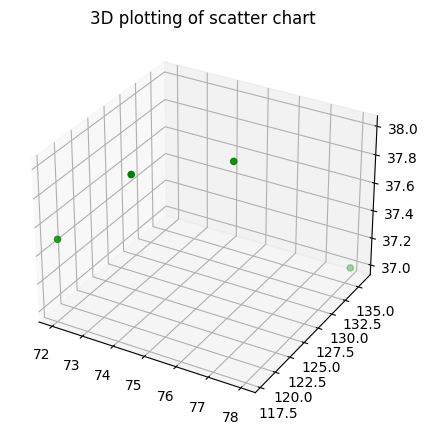

In [ ]:
x=x_1
y=x_2
z=x_3

fig = pyplot.figure(figsize = (5, 5))
ax = pyplot.axes(projection = '3d')

ax.scatter(x, y, z, c='Green')
ax.set_title('3D plotting of scatter chart')

# Print the chart
pyplot.show()

# **2. Which two patients are nearest**

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances


# Calculate pairwise distances using Euclidean distance
distances = pairwise_distances(X, metric='euclidean')
#print(distances)
print(np.shape(distances))
print(type(distances))


# Set diagonal elements (distance to self) to a high value
np.fill_diagonal(distances, np.inf)

# Find indices of the minimum distance in the distance matrix
row_idx, col_idx = np.unravel_index(np.argmin(distances), distances.shape)
print(row_idx)
print(col_idx)
print(distances.shape)

# Get the nearest patients
nearest_patient_1 = X[row_idx]
nearest_patient_2 = X[col_idx]

print("Nearest Patients are :", nearest_patient_1, nearest_patient_2)

(4, 4)
<class 'numpy.ndarray'>
1
2
(4, 4)
Nearest Patients are : [ 74. 120.  38.] [ 72.  118.   37.5]


# **3. Create a dummy patient and then find which is the closest patient.**

In [ ]:
#Creation of dummy patient
dummy_patient = np.array([73, 119, 37.0])

In [ ]:
# Calculate Euclidean distances between the dummy patient and all patients
distances = np.sqrt(np.sum((dummy_patient - X) ** 2, axis=1))

# Find the index of the closest patient
closest_patient_index = np.argmin(distances)

# Get the closest patient
closest_patient = X[closest_patient_index]

print("Dummy Patient:", dummy_patient)
print("Closest Patient:", closest_patient)


Dummy Patient: [ 73. 119.  37.]
Closest Patient: [ 72.  118.   37.5]


1. Time complexity of,
Farthest Patient and Closest Two Patients - O(N^2 * M)

2. Anomaly Detection, Disease Subtyping